# Dimensional Reduction Tutorial

1. A short description: 
Dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables.The dimension I chosen is more clearly and earlier to analyze the dataset.

2. Initial Data setup:
One dataset contain the crime recording in Chicago 2008-2012. 
Another dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” by Chicago community area, for the years 2008 – 2012. 
I collect the Primary Type of "BATTERY" and merge the first dataset into the other one, then do the dimension reduction.

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [38]:
crime=pd.read_csv('Crimes_-_2001_to_present.csv',usecols =['Primary Type','Community Area'])
crime.dropna(axis=0,how='any',inplace=True)
BATTERY=crime[crime['Primary Type']=='BATTERY']
crime_count=crime['Community Area'].value_counts()
crime_count=crime_count.reset_index()  
crime_count.columns=['Community Area Number','crime_number']  
crime_count.head()

,Community Area Number,crime_number
0,25.0,391248
1,8.0,209299
2,43.0,200373
3,23.0,194222
4,24.0,181632


In [41]:
CommunityInfo=pd.read_csv('socioeconomic.csv')
CommunityInfo=CommunityInfo[:-1]  
CommunityInfo.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [42]:
CommunityInfo=CommunityInfo.merge(crime_count,on='Community Area Number')
CommunityInfo.set_index(["COMMUNITY AREA NAME"], inplace=True)
CommunityInfo=CommunityInfo.drop(columns=['Community Area Number'])
CommunityInfo.head()

,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,crime_number
COMMUNITY AREA NAME,,,,,,,,
Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,94124
West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,76617
Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,89963
Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,43056
North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,36904


3. Dimensional reduction process 

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(CommunityInfo)
PCA(copy=True, n_components=2, whiten=False)
existing_2d = pca.transform(CommunityInfo)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = CommunityInfo.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
COMMUNITY AREA NAME,,
Rogers Park,14377.821835,-1712.333866
West Ridge,-3134.361298,-2503.985278
Uptown,10289.546542,10160.973093
Lincoln Square,-36605.921728,12185.556295
North Center,-42637.632923,31821.901500


In [44]:
print(pca.explained_variance_ratio_)

[0.94984005 0.05015987]


4. Display in graph and plots:

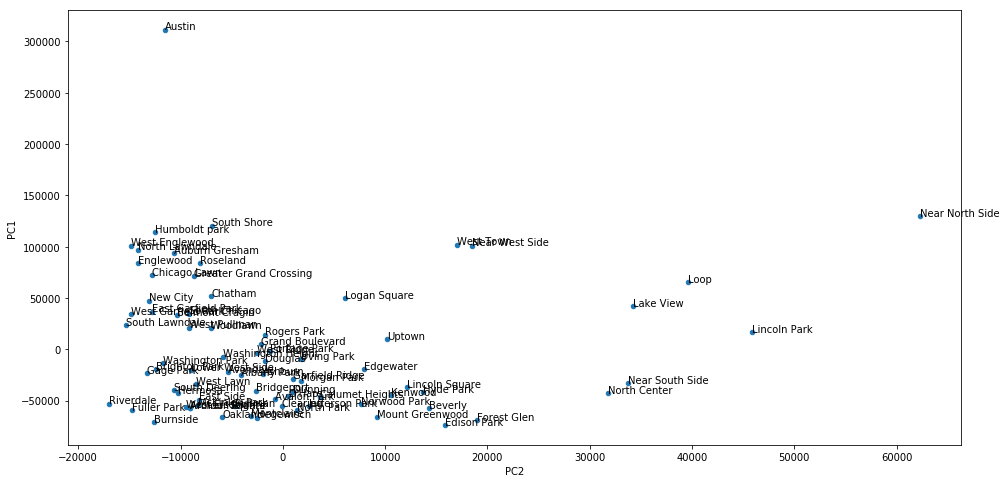

In [45]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(CommunityInfo.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

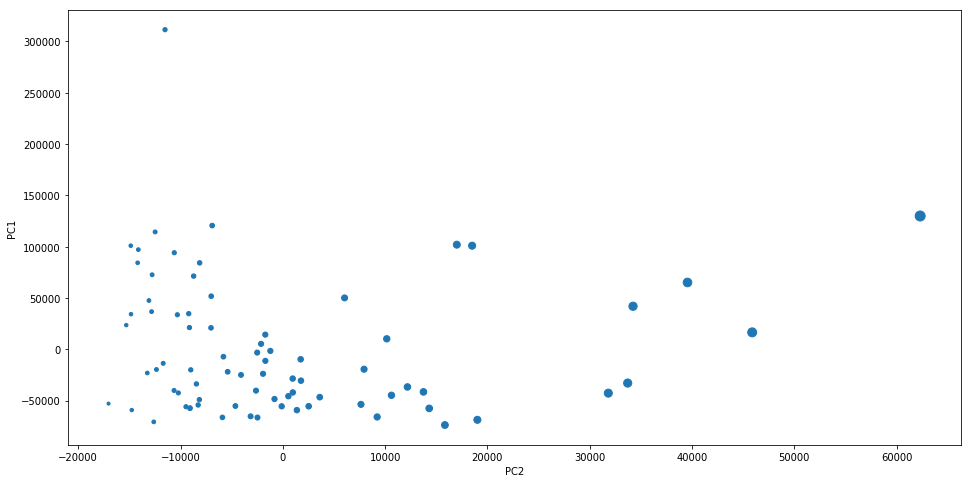

In [46]:
max_income=CommunityInfo['PER CAPITA INCOME '].max()
existing_df_2d['INCOME']=CommunityInfo['PER CAPITA INCOME ']/max_income
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['INCOME']*100, 
    figsize=(16,8))

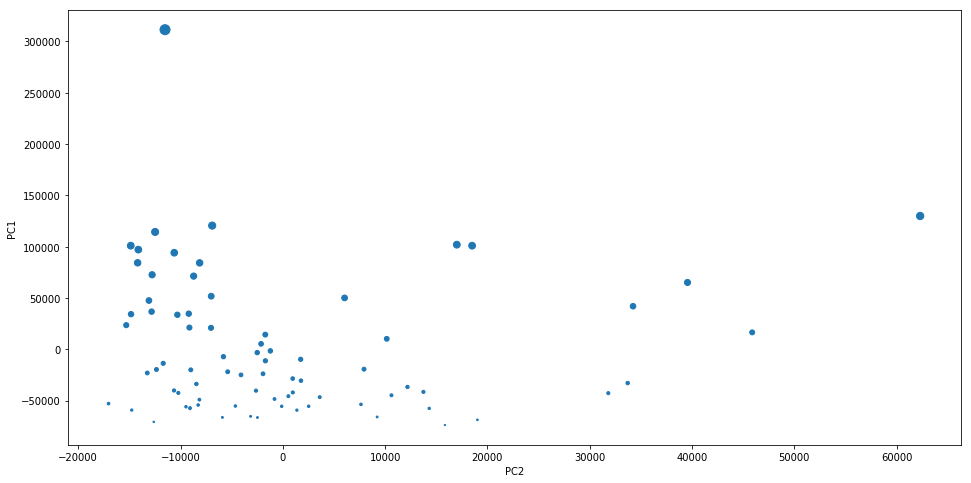

In [47]:
max_num=CommunityInfo['crime_number'].max()
existing_df_2d['CRIME']=CommunityInfo['crime_number']/max_num
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['CRIME']*100, 
    figsize=(16,8))

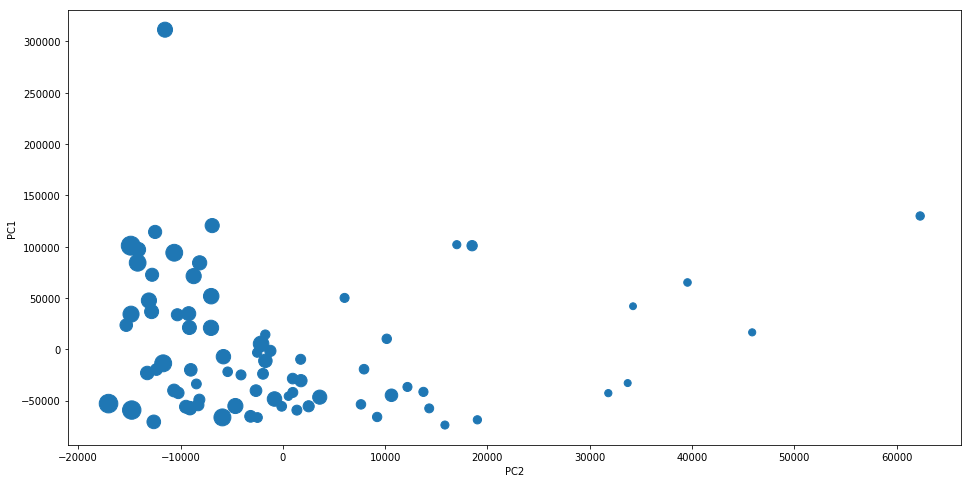

In [48]:
existing_df_2d['PERCENT AGED 16+ UNEMPLOYED']=CommunityInfo['PERCENT AGED 16+ UNEMPLOYED']
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['PERCENT AGED 16+ UNEMPLOYED']*10, 
    figsize=(16,8))

5. Discussion of the images in the graphs and plots:
From the plots we have done, we can confirm that most variation happens along the y axis, that we have assigned to PC1. We saw that the first PC already explains almost 95% of the variance, while the second one accounts for another 5% for a total of almost 100% between the two of them. At the very bottom of our charts we could see an important concentration of these areas. While we ascent that axis, the number of community is more sparse.

6. Bibliography:
https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

https://github.com/jadianes/data-science-your-way/blob/master/03-dimensionality-reduction-and-clustering/dimensionality-reduction-clustering-python.ipynb

# Extra Credit: Uncovering data structure with k-means clustering

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit(CommunityInfo)

In [50]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

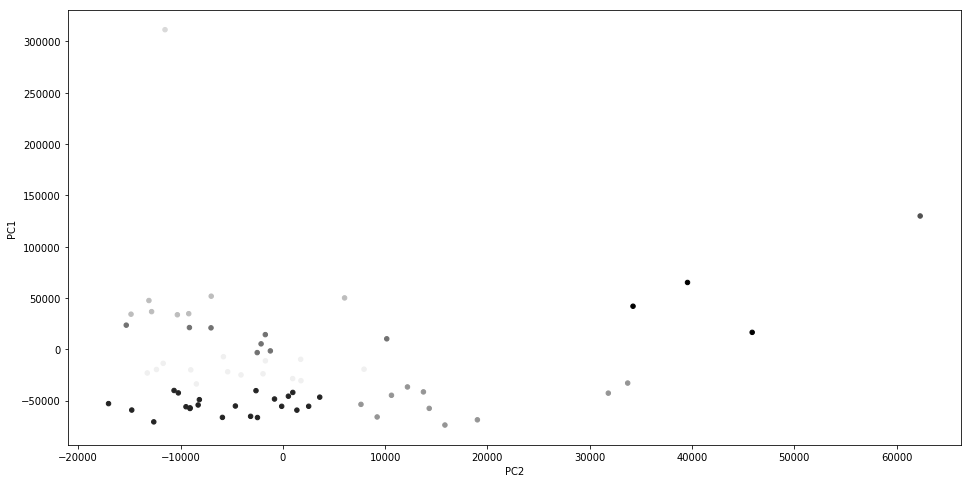

In [51]:
import numpy as np
existing_df_2d.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=existing_df_2d.cluster.astype(np.float), 
    figsize=(16,8))